AIDA CAPSTONE PROJECT BOLA-DADDYSON
CNN VERSION 1

In [1]:
#!pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

In [2]:
import zipfile
import os
!pip install patool
import patoolib

# Path to the uploaded zip file  (CHANGE THIS)
zip_file_path = "C:/Users/BOLA OLATUNJI/Documents/ACADEMIC/SCHOOL/Canada/ACADEMIC SASK/FALL SEMESTER 2024/FRI PROJ 613 CAPSTONE/MODELS/CNN/AIDA CAPSTONEv4.rar"

# Extract all files to a directory
# Use patoolib to extract rar files
patoolib.extract_archive(zip_file_path, outdir="/content/unzipped_files")

# List the extracted files
print(os.listdir("/content/unzipped_files"))


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
INFO patool: Extracting C:/Users/BOLA OLATUNJI/Documents/ACADEMIC/SCHOOL/Canada/ACADEMIC SASK/FALL SEMESTER 2024/FRI PROJ 613 CAPSTONE/MODELS/CNN/AIDA CAPSTONEv4.rar ...
INFO patool: could not find a 'file' executable, falling back to guess mime type by file extension
INFO patool: running "C:\Program Files\WinRAR\rar.EXE" x -kb -or -- "C:\Users\BOLA OLATUNJI\Documents\ACADEMIC\SCHOOL\Canada\ACADEMIC SASK\FALL SEMESTER 2024\FRI PROJ 613 CAPSTONE\MODELS\CNN\AIDA CAPSTONEv4.rar"


Defaulting to user installation because normal site-packages is not writeable


INFO patool: ... C:/Users/BOLA OLATUNJI/Documents/ACADEMIC/SCHOOL/Canada/ACADEMIC SASK/FALL SEMESTER 2024/FRI PROJ 613 CAPSTONE/MODELS/CNN/AIDA CAPSTONEv4.rar extracted to `/content/unzipped_files'.


['AIDA CAPSTONE.v1i.yolov11', 'AIDA CAPSTONEv2', 'AIDA CAPSTONEv3', 'AIDA CAPSTONEv4']


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

In [4]:
base_dir = '/content/unzipped_files/AIDA CAPSTONEv4'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [5]:
validation_dir

'/content/unzipped_files/AIDA CAPSTONEv4\\validation'

In [6]:
import tensorflow as tf
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Parameters
img_height, img_width = 224, 224  # Image size to conform to transfer learning
batch_size = 32
NUM_CLASSES = 2

# Load datasets
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=0.1,
    subset="both",
    seed=123
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)




Found 3374 files belonging to 2 classes.
Using 3037 files for training.
Using 337 files for validation.
Found 810 files belonging to 2 classes.


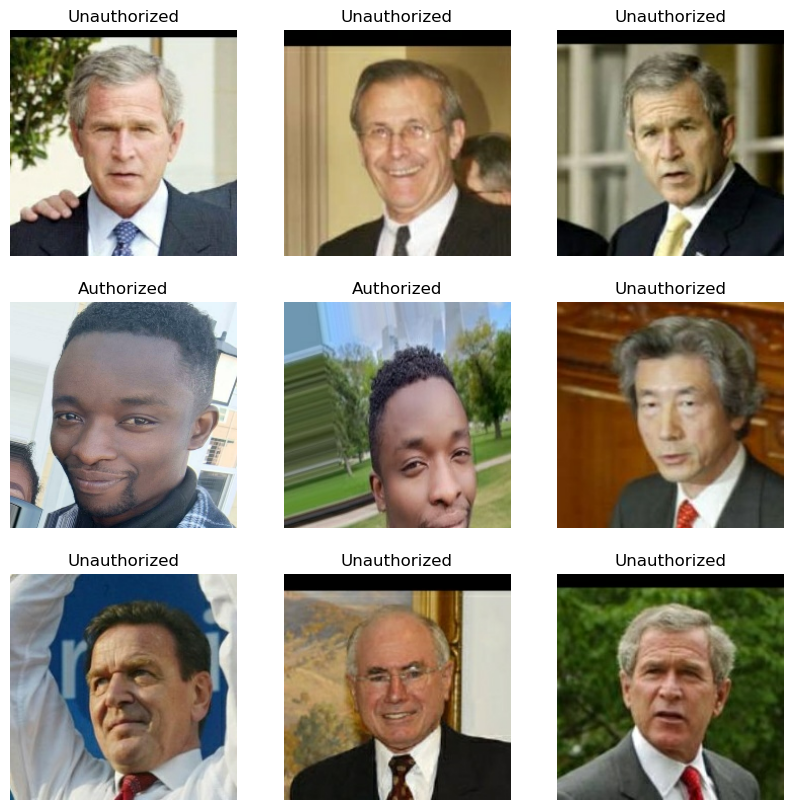

In [7]:
import tensorflow as tf
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Import the necessary library
import matplotlib.pyplot as plt
class_names = ["Authorized", "Unauthorized"]

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:


# Helper function to extract HOG features
def extract_hog_features(images):
    hog_features = []
    for img in images:
        img_resized = tf.image.resize(img, (224, 224))  # Resize for HOG compatibility
        img_gray = tf.image.rgb_to_grayscale(img_resized).numpy().squeeze()  # Convert to grayscale
        features = hog(
            img_gray,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            orientations=9,
            block_norm='L2-Hys'
        )
        hog_features.append(features)
    return np.array(hog_features)

# Prepare HOG features and labels
def prepare_data(dataset):
    images, labels = [], []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    images = np.concatenate(images, axis=0)
    labels = np.concatenate(labels, axis=0)
    features = extract_hog_features(images)
    return features, labels, images

# Extract features and labels
train_features, train_labels, _ = prepare_data(train_ds)
val_features, val_labels, _ = prepare_data(val_ds)
test_features, test_labels, test_images = prepare_data(test_ds)

# Standardize the features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

# Train an SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(train_features, train_labels)

# Make predictions on validation set
val_predictions = svm_model.predict(val_features)
val_probabilities = svm_model.predict_proba(val_features)[:, 1]

# Evaluate the model on multiple metrics
accuracy = accuracy_score(val_labels, val_predictions)
precision = precision_score(val_labels, val_predictions, average='binary')
recall = recall_score(val_labels, val_predictions, average='binary')
f1 = f1_score(val_labels, val_predictions, average='binary')
roc_auc = roc_auc_score(val_labels, val_probabilities)

# Display metrics
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")




Validation Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
ROC-AUC: 1.00


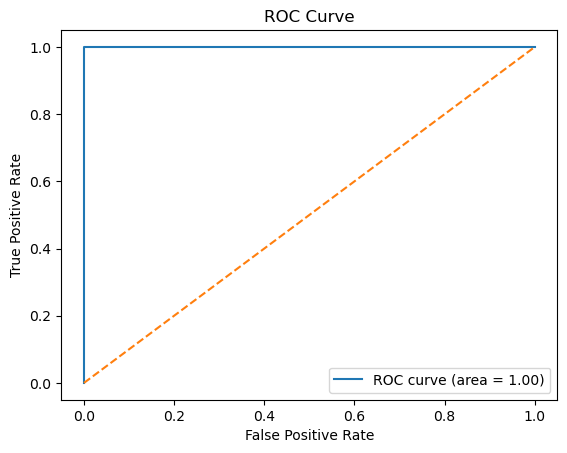

In [9]:
# Plot ROC Curve
# Import the roc_curve function from sklearn.metrics
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(val_labels, val_probabilities)
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

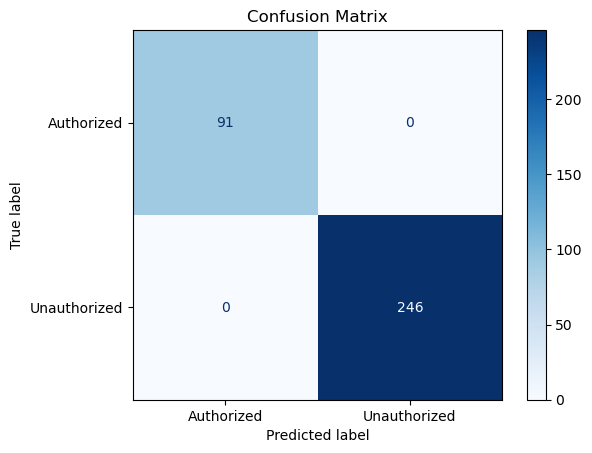

In [10]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(val_labels, val_predictions, display_labels=class_names, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



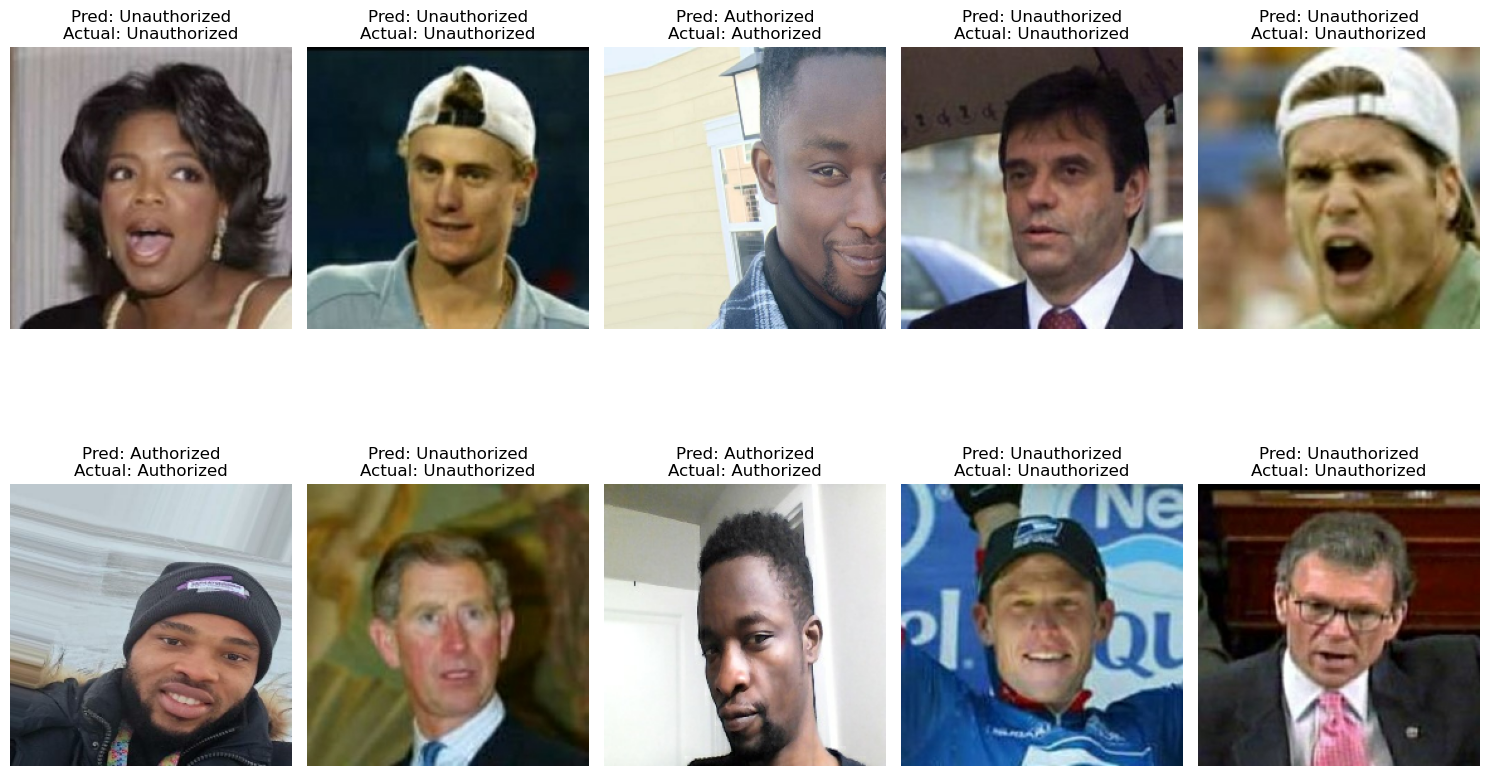

In [11]:
# Display 10 predictions with images
sample_indices = np.random.choice(len(test_features), 10, replace=False)
plt.figure(figsize=(15, 10))
for i, idx in enumerate(sample_indices):
    test_prediction = svm_model.predict([test_features[idx]])[0]
    actual_label = test_labels[idx]
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[idx].astype("uint8"))
    plt.title(f"Pred: {class_names[test_prediction]}\nActual: {class_names[actual_label]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

## Visualizing results of the training

# Save and Load trained models

## Save as Keras .h5 model

Ref: https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l07c01_saving_and_loading_models.ipynb

In [28]:
import joblib
import pickle
from sklearn import svm
# Export the trained SVM model
# Train SVM classifier
# Extract HOG features
#train_hog_features = extract_hog_features(train_features)
#val_hog_features = extract_hog_features(val_images)
clf = svm.SVC(kernel='linear', probability=True)
clf.fit(train_features, train_labels)

model_filename = 'svm_model.pkl'
joblib.dump(clf, model_filename)

print(f'Trained SVM model exported as {model_filename}')


Trained SVM model exported as svm_face_recognition_model.pkl


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
# Set up webcam capture
cap = cv2.VideoCapture(0)
print("Camera opened:", cap.isOpened())

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 224)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 224)

# Check if the webcam is opened correctly
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        break

    # Preprocess the frame
    input_width, input_height = 224, 224  # Replace with your model's input size
    resized_frame = cv2.resize(frame, (input_width, input_height))
    rgb_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)
    normalized_frame = rgb_frame / 255.0
    input_frame = np.expand_dims(normalized_frame, axis=0)

    # Model prediction
    prediction = svm_model.predict(input_frame)
   

    confidence = np.max(prediction)
    if confidence > 0.5:  # Confidence threshold
        predicted_class = class_names[np.argmax(prediction)]
    else:
        predicted_class = "Unknown"

    # Display the prediction on the frame
    cv2.putText(frame, f"Prediction: {predicted_class}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Show the frame
    cv2.imshow('Live Prediction', frame)

    # Break loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close OpenCV windows
cap.release()
cv2.destroyAllWindows()